<a href="https://colab.research.google.com/github/Maternowsky/Maternowsky/blob/main/Predicting_continuous_target_variables_with_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression- univariate- model relationship between a single feature(x) and continuos-valued target(y)**

# **Multiple Linear Regression- multiple explanitory variables**

# **Ames Housing Dataset- contains 80 features but will be using a subset of features that include ovearall quality, overall condition, living area, central air, basement area, sale price. The sale price will be the target variable**

In [1]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air',
           'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep = '\t',
                 usecols= columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

## **'Central Air is string( Y, N) we need to take care of that**

In [3]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

## **Check if any missing values**

In [4]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

### **Total Bsmt SF has one missing value so we will drop it**

In [5]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

# **Visualizing Important Characteristics - Exploratory Data Analysis (EDA)- Detect Outliers**

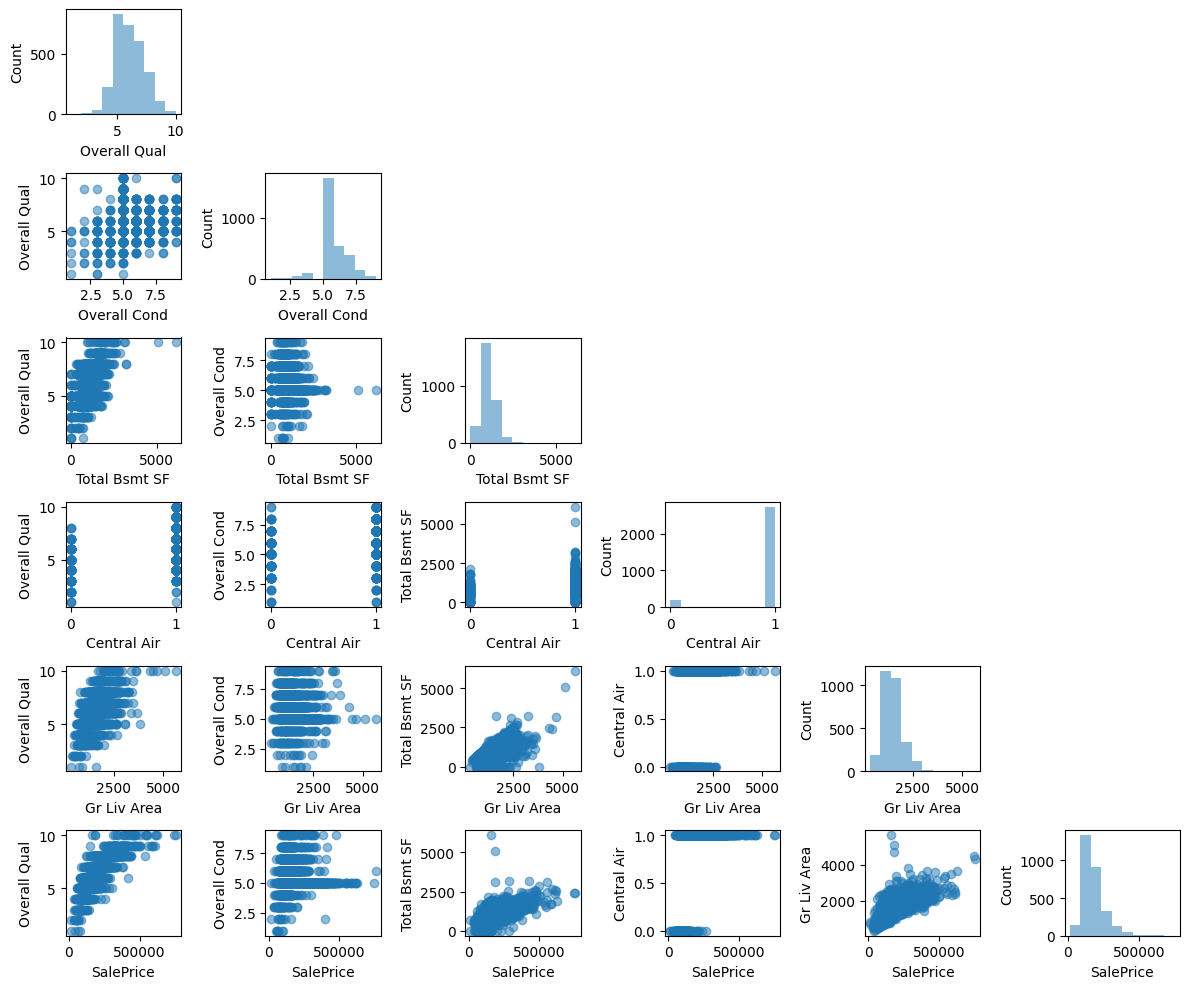

In [6]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12,10),
                  names = df.columns,
                  alpha=0.5)
plt.tight_layout()
plt.show()

## **Create Correlation Matrix after visualizing data- Pearson produc-moment correlation coefficient(measures linear dependence between paris of features)(perfect positive correlation if r = 1, no correlation if r = 0, perfect negative correlation if r = -1)**

In [7]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


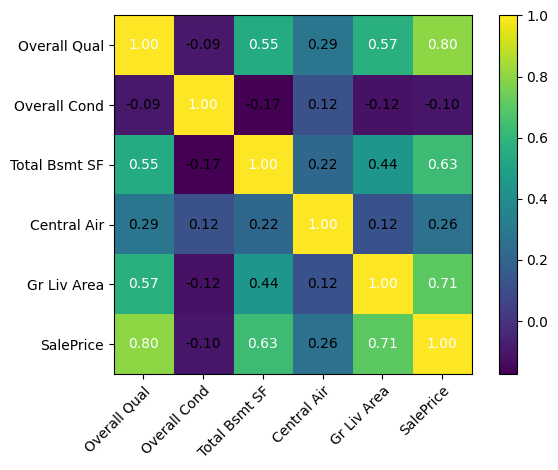

In [8]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names = df.columns,
             column_names = df.columns)
plt.tight_layout()
plt.show()

# **Ordinary least squares linear regression**

In [9]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

## **Using the Gr Living Area feature to train model to predict sale price. will standardize variables**

In [10]:
X = df[['Gr Liv Area']].values
y = df[['SalePrice']].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()
print(y_std[:10])
print(X_std[:10])

[ 0.42783926 -0.94949293 -0.11057241  0.79095411  0.1135571   0.18367583
  0.40905746  0.13359102  0.6970451   0.10228802]
[[ 0.30887979]
 [-1.19492198]
 [-0.33815071]
 [ 1.20720348]
 [ 0.25545525]
 [ 0.20598809]
 [-0.32034253]
 [-0.43510635]
 [ 0.22973233]
 [ 0.6017254 ]]


### **plot loss as a function of number of epochs to check algorithm converged to a loss minimum**

In [11]:
lr = LinearRegressionGD(eta= 0.1)
lr.fit(X_std, y_std)

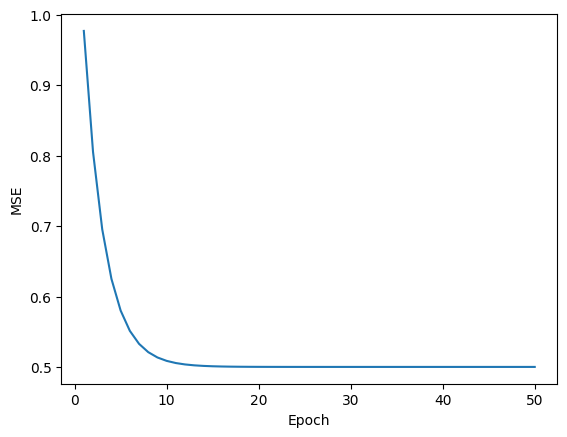

In [12]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

### **Plot a scatterplot of training examples and add the regression line**

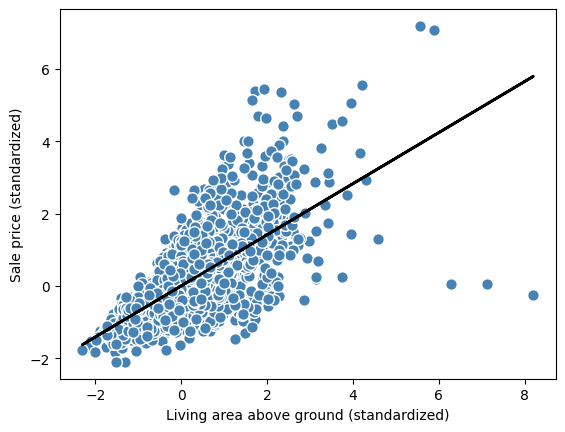

In [13]:
def lin_regplot(X,y, model):
  plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s=70)
  plt.plot(X, model.predict(X), color= 'black', lw = 2)
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

### **Plot original price back on using inverse_transform method of StandardScaler**

In [14]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1,1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')

Sales price: $292507.07


### **Don't always have to update the intercept paramaters(bias unit b) if we are working with standardized variables since the y axis intercept is always 0 in those cases**

In [15]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


# **least squares implimentation in Scipy. uses optimized code based on Linear Algebra Package (LAPACK). Works better with unstandardized variables since it does not use (S)GD optimization. can skip standardization step**

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]}')
print(f'Intercept: {slr.intercept_}')

Slope: [111.66625842]
Intercept: [13342.97866235]


## **Plotting to see how unstandardized variables look compared to our standardized implementation**

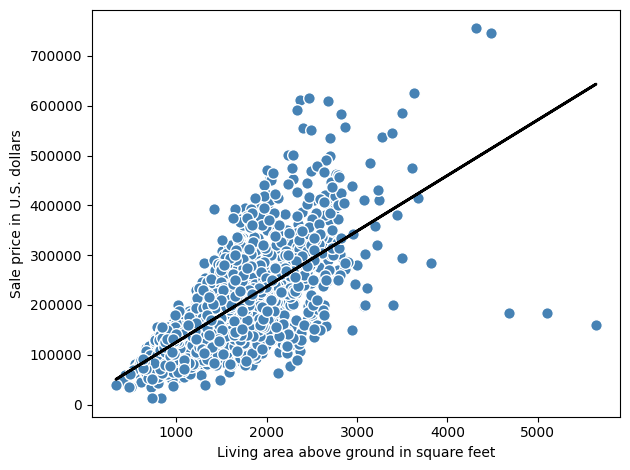

In [17]:
lin_regplot(X,y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

### **Alternative to use machine learning libraries. there is closed form solution for solving ols using linear equations**

In [18]:
#adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0],1)),X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))
print(f'Slope: {w[1]}')
print(f'Intercept: {w[0]}')

Slope: [111.66625842]
Intercept: [13342.97866236]


# **Fitting a robust regression  model using RANSAC. Random sample Consensus**

In [19]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(), max_trials = 100,
                         min_samples = 0.95,
                         residual_threshold=None,
                         random_state = 123)
ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

## **Scikit-Learn uses MAD, Median Absolute Deviation to select inlier threshold**

## **Obtain inliers and outliers from the fitted RANSAC linear regression model**

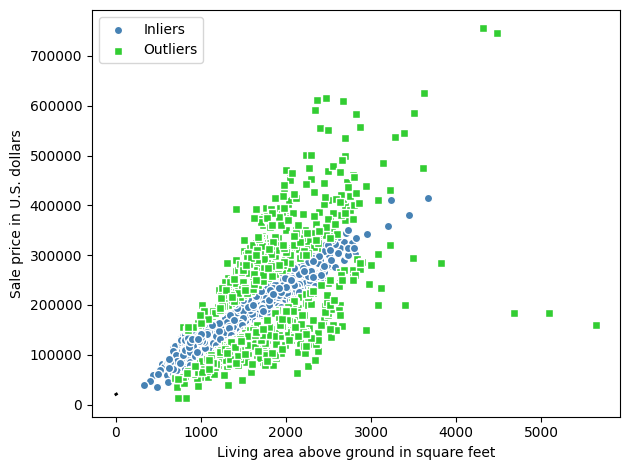

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c = 'steelblue', edgecolor = 'white',
            marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'limegreen', edgecolor = 'white',
            marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'black',
         lw = 2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### **Print the slope and intercept of model**

In [21]:
print(f'Slope: {ransac.estimator_.coef_[0]}')
print(f'Intercept: {ransac.estimator_.intercept_}')

Slope: [106.34799704]
Intercept: [20190.09261685]


### **MAD for this dataset**

In [22]:
def median_absolute_deviation(data):
  return np.median(np.abs(data - np.median(data)))
  
median_absolute_deviation(y)

37000.0

### **If we want to identify fewer datapoints as outliers, we choose a residual_threshold value greater than the preceding MAD**

## **Testing model on linear regression**

In [25]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 123)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

## **Model has multiple explanatory variables, means we can't visualize in two dimensional plot. Residual Plot can be used**

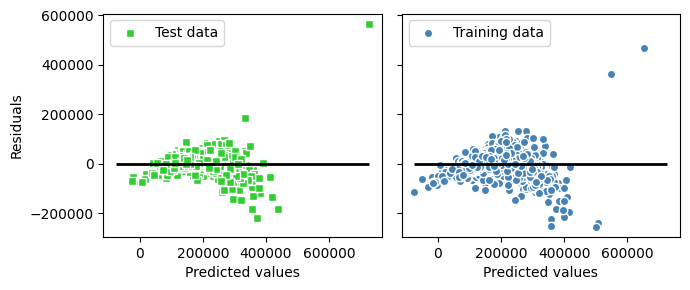

In [27]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min (y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1 , 2, figsize = (7, 3), sharey = True)
ax1.scatter( y_test_pred, y_test_pred - y_test, 
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
ax2.scatter( y_train_pred, y_train_pred - y_train,
            c = 'steelblue', marker = 'o', edgecolor = 'white',
            label = 'Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
  ax.set_xlabel('Predicted values')
  ax.legend(loc = 'upper left')
  ax.hlines( y=0, xmin = x_min - 100, xmax = x_max +100,
            color = 'black', lw = 2)
plt.tight_layout()
plt.show()

### **Calculate MSE**

In [28]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


### **Can see that MSE is less on training set than test set, means our model is lightly overfitting the training data. Can be more intuitive to show the error on the original unit scale, we may choose to compute the rooot mean squared error or mean absolute error(MAE)**

In [29]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


### **based on MAE we can say the model makes an error of approximately $25000 on average**

## **Coefficient of determination (R^2) can be understood as a standardized version of MSE. Good because sometimes data is represented in multiples**

In [31]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

R^2 train: 0.769, 0.752


# **Regularization in Linear Regression- common techniques include ridge reduction, least absolute shrinkage and selection operator(LASSO), and elastic net**

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)
# regularization strength is regulated by parameter alpha

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# **Turning a linear regression model into a curve- polynomial regression**

In [33]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 
              368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 
              342.2, 360.8, 368.0, 391.2, 390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)



In [34]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [36]:
pr.fit(X_quad, y )
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))


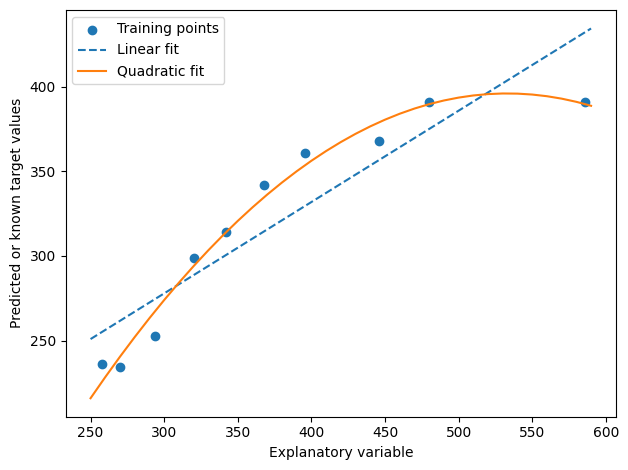

In [37]:
plt.scatter(X,y, label = 'Training points')
plt.plot(X_fit, y_lin_fit, label = 'Linear fit', linestyle = '--')
plt.plot(X_fit, y_quad_fit, label = 'Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## ***Calculate the MSE and R^2 metrics***

In [38]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y,y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}' f', quadratic: {mse_quad:.3f}')

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}' f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


# **Modeling nonlinear relationships in the Ames Housing dataset**

In [40]:
#removing outliers
X = df [['Gr Liv Area']].values
y = df [[ 'SalePrice']].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

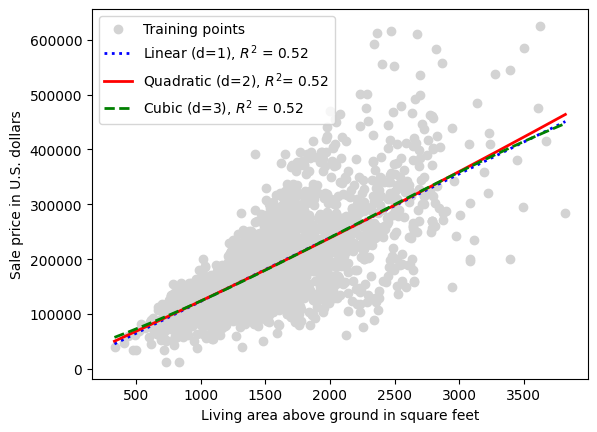

In [41]:
regr = LinearRegression()
#create quadratic and cubic features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic= cubic.fit_transform(X)
#fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#plot the results 
plt.scatter(X,y, label = 'Training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = f'Linear (d=1), $R^2$ = {linear_r2:.2f}',
         color = 'blue', lw = 2, linestyle = ':')
plt.plot(X_fit, y_quad_fit, label = f'Quadratic (d=2), $R^2$= {quadratic_r2:.2f}',
         color = 'red', lw = 2, linestyle = '-')
plt.plot(X_fit, y_cubic_fit, label = f'Cubic (d=3), $R^2$ = {cubic_r2:.2f}',
         color = 'green', lw = 2, linestyle = '--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

## **The quadratic and cubic features did not really have an effect because the relationship between the two variables seems to be linear. Now we will look at another feature (Overall Qual.)**

In [42]:
X= df[['Overall Qual']].values
y = df[['SalePrice']].values

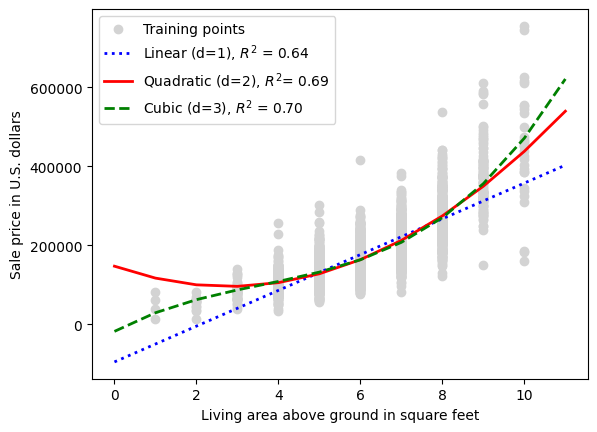

In [43]:
regr = LinearRegression()
#create quadratic and cubic features
quadratic = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
X_quad = quadratic.fit_transform(X)
X_cubic= cubic.fit_transform(X)
#fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

#plot the results 
plt.scatter(X,y, label = 'Training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = f'Linear (d=1), $R^2$ = {linear_r2:.2f}',
         color = 'blue', lw = 2, linestyle = ':')
plt.plot(X_fit, y_quad_fit, label = f'Quadratic (d=2), $R^2$= {quadratic_r2:.2f}',
         color = 'red', lw = 2, linestyle = '-')
plt.plot(X_fit, y_cubic_fit, label = f'Cubic (d=3), $R^2$ = {cubic_r2:.2f}',
         color = 'green', lw = 2, linestyle = '--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

# **Dealing with nonlinear relationships using random forests**

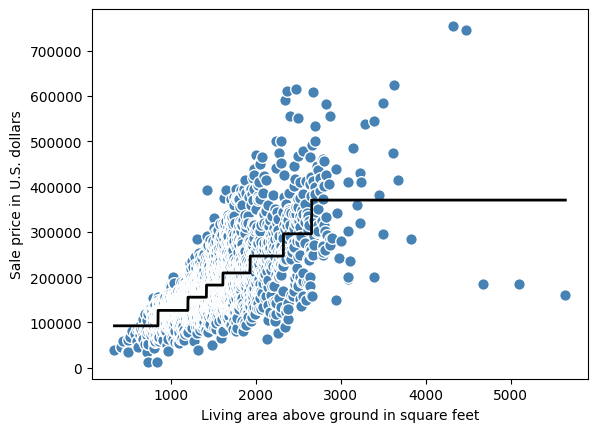

In [44]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Gr Liv Area']].values
y = df[['SalePrice']].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

## **Can see the relationship between Gr Living Area and SalePrice is rather linear so we are encouraged to use the decision tree on the Overall Qual variable instead**

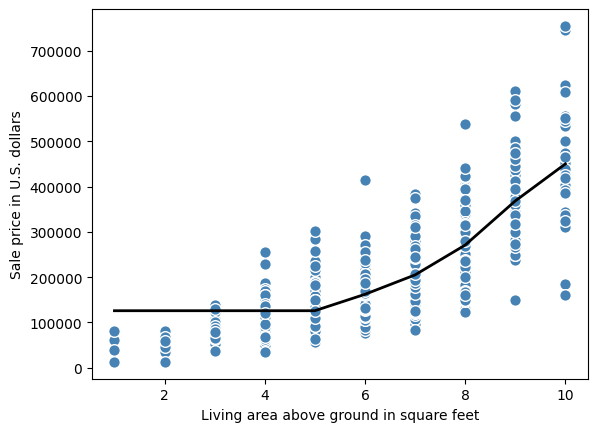

In [45]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Overall Qual']].values
y = df[['SalePrice']].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

## **Random forest on Ames Housing Data**

In [46]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 123)
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( n_estimators = 1000, criterion = 'squared_error',
                               random_state = 1, 
                               n_jobs = -1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 24921.29
R^2 train: 0.98
R^2 test: 0.85


### **looking at the residuals of the prediction**

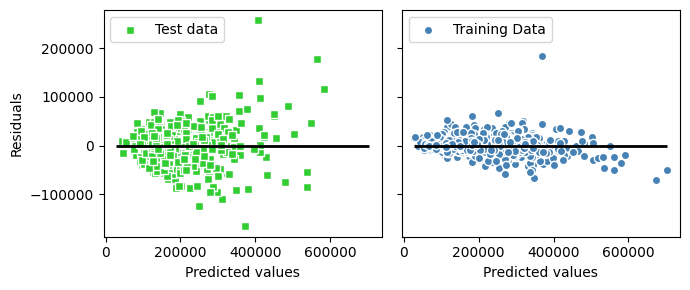

In [48]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (7,3), sharey = True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',
            label = 'Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c = 'steelblue', marker = 'o',
            edgecolor = 'white', label = 'Training Data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
  ax.set_xlabel('Predicted values')
  ax.legend(loc = 'upper left')
  ax.hlines(y=0, xmin = x_min-100, xmax=x_max+100,
            color = 'black', lw=2)
  
plt.tight_layout()
plt.show()